<a href="https://colab.research.google.com/github/Spinner101/HUSOP_PHS317_Pharmaceutical_Analysis/blob/main/Module_04_PHS317_UVVis.Module_04_PHS317_UVVis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌈 PHS 317 – Pharmaceutical Analysis  
## Module 04: UV/Visible Spectrophotometry  

**Instructor:** Prof. Bolden  
**Textbook:** *Pharmaceutical Analysis* (Watson, Ch. 4 – Ultraviolet and Visible Spectroscopy)

> This activity is designed to be completed **during the scheduled class meeting**.  
> You will explore absorbance vs concentration, wavelength selection, and basic
> method design for UV/Vis assays of pharmaceuticals.


In [ ]:
# @title 👤 Student Information (required – code can be hidden)
student_id = ""  # @param {type:"string"}
student_name = ""  # @param {type:"string"}

COURSE = "PHS 317 – Pharmaceutical Analysis"
MODULE_NAME = "M04_UVVis_Spectrophotometry"

print("Hampton University – School of Pharmacy")
print(COURSE)
print("Module 04: UV/Visible Spectrophotometry")
print(f"Instructor: Prof. Bolden")
print(f"Student: {student_name} (ID: {student_id})")
print("\nThis activity is designed to be completed during the scheduled class meeting.")


## 1️⃣ Concept Overview

UV/Vis spectrophotometry is widely used in **pharmaceutical analysis** for:

- Assay of drug substances and products  
- Dissolution and content uniformity testing  
- Impurity profiling (when chromophores differ)  

In this module, we will focus on:

- **Beer–Lambert Law** and linear calibration:
  \[
  A = \varepsilon b c
  \]
- Choosing an appropriate **wavelength (λ\_max)**  
- Evaluating **linearity and sensitivity**  
- Recognizing limitations (stray light, high absorbance, matrix effects)

### Learning Outcomes

By the end of this module, you should be able to:

1. **Describe** the Beer–Lambert law and factors affecting absorbance.  
   *(SILO 1 – Understand)*  

2. **Use** calibration data to determine an unknown concentration and assess  
   linearity.  
   *(SILO 3 – Apply/Analyze)*  

3. **Evaluate** wavelength selection and method suitability for a given drug/impurity  
   scenario.  
   *(SILO 5 – Evaluate)*


In [1]:
# @title 🛠 Grading Helpers (instructor logic – hide code)
def grade_mcq(ans, key):
    return 1 if str(ans).strip().upper() == str(key).strip().upper() else 0

def grade_numeric(val, key, tol=0.5):
    try:
        return 1 if abs(float(val) - float(key)) <= tol else 0
    except Exception:
        return 0


## 2️⃣ Warm-up Check (iRAT-style)

Answer these quickly to warm up your understanding of Beer–Lambert law and UV/Vis basics.


In [2]:
# @title Q1 – Beer–Lambert Law
print(r"""
**Q1.** According to Beer–Lambert law, absorbance (A) is directly proportional to:

A. Path length and \[concentration\] only
B. Concentration only
C. Molar absorptivity (ε), path length (b), and concentration (c)
D. Transmittance (T) squared
""")

q1 = "A"  # @param ["A","B","C","D"]
q1_key = "C"
q1_score = grade_mcq(q1, q1_key)

if q1_score:
    print("✅ Correct. A = ε b c, so A depends on ε, path length, and concentration.")
else:
    print("❌ Remember: A = ε b c. All three factors matter.")



**Q1.** According to Beer–Lambert law, absorbance (A) is directly proportional to:

A. Path length and \[concentration\] only  
B. Concentration only  
C. Molar absorptivity (ε), path length (b), and concentration (c)  
D. Transmittance (T) squared

❌ Remember: A = ε b c. All three factors matter.


In [3]:
# @title Q2 – Absorbance vs Transmittance
print(r"""
**Q2.** If transmittance (T) = 0.10 (10%), what is the absorbance A?

Use:
\[
A = -\log_{10}(T)
\]

A. 0.10
B. 0.50
C. 1.00
D. 2.00
""")

q2 = "A"  # @param ["A","B","C","D"]
q2_key = "C"  # A = -log10(0.10) = 1.0
q2_score = grade_mcq(q2, q2_key)

if q2_score:
    print("✅ Correct. A = -log10(0.10) = 1.0.")
else:
    print("❌ Tip: A = -log10(T). 10% transmittance corresponds to A = 1.0.")



**Q2.** If transmittance (T) = 0.10 (10%), what is the absorbance A?

Use:  
\[
A = -\log_{10}(T)
\]

A. 0.10  
B. 0.50  
C. 1.00  
D. 2.00

❌ Tip: A = -log10(T). 10% transmittance corresponds to A = 1.0.


## 3️⃣ Beer–Lambert Law & Linear Calibration

### Beer–Lambert Law

For a single absorbing species:

\[
A = \varepsilon b c
\]

Where:

- \( A \) = absorbance (unitless)  
- \( \varepsilon \) = molar absorptivity (L·mol⁻¹·cm⁻¹)  
- \( b \) = path length (cm)  
- \( c \) = concentration (mol·L⁻¹)  

At fixed wavelength (λ) and path length (b):

\[
A \propto c
\]

This linear relationship is the basis of **calibration curves** used in pharmaceutical assays.

### Typical Practice

1. Prepare standards at known concentrations.  
2. Measure absorbance at a selected wavelength (often **λ\_max**).  
3. Fit a straight line:
   \[
   A = m c + A_0
   \]
   where \( m \approx \varepsilon b \) and \( A_0 \) is the intercept (ideally ≈ 0).  
4. Use the line to **back-calculate unknown concentrations**.


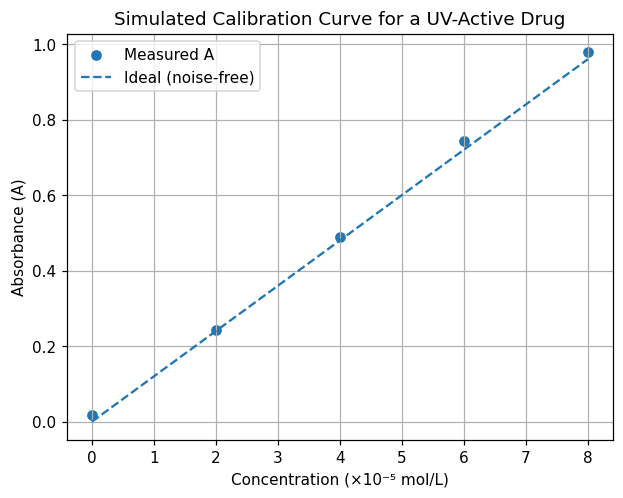


This plot shows a typical calibration curve:
• Absorbance increases linearly with concentration.
• Small experimental noise is present in the measured points.



In [4]:
# @title 📊 Simulated Calibration Curve (A vs c)
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 110

# Simulated parameters
epsilon = 12000   # L mol^-1 cm^-1
b = 1.0           # cm
concs = np.array([0.0, 2.0, 4.0, 6.0, 8.0]) * 1e-5  # mol/L
true_A = epsilon * b * concs

# add a little noise to simulate measurement
np.random.seed(0)
measured_A = true_A + np.random.normal(0, 0.01, size=true_A.shape)

plt.figure()
plt.scatter(concs*1e5, measured_A, label="Measured A")
plt.plot(concs*1e5, true_A, linestyle="--", label="Ideal (noise-free)")
plt.xlabel("Concentration (×10⁻⁵ mol/L)")
plt.ylabel("Absorbance (A)")
plt.title("Simulated Calibration Curve for a UV-Active Drug")
plt.grid(True)
plt.legend()
plt.show()

print("""
This plot shows a typical calibration curve:
• Absorbance increases linearly with concentration.
• Small experimental noise is present in the measured points.
""")


## 4️⃣ Interactive Playground – Effect of ε, b, and c

Use the sliders to see how changing:

- **ε** (molar absorptivity)  
- **b** (path length)  
- **max concentration range**

affects the linearity and sensitivity of the calibration curve.


In [5]:
# @title 🎮 Beer–Lambert Interactive Calibration
import ipywidgets as widgets
from ipywidgets import interact

def calibration_playground(epsilon=12000, b=1.0, c_max=8e-5):
    concs = np.linspace(0, c_max, 6)
    true_A = epsilon * b * concs
    np.random.seed(1)
    measured_A = true_A + np.random.normal(0, 0.01, size=true_A.shape)

    plt.figure()
    plt.scatter(concs*1e5, measured_A, label="Measured A")
    plt.plot(concs*1e5, true_A, linestyle="--", label="Ideal A = ε b c")
    plt.xlabel("Concentration (×10⁻⁵ mol/L)")
    plt.ylabel("Absorbance (A)")
    plt.title(f"Calibration (ε={epsilon:.0f}, b={b:.2f} cm)")
    plt.grid(True)
    plt.legend()
    plt.show()

    print(f"Max concentration shown: {c_max*1e5:.1f} × 10⁻⁵ mol/L")
    print("""
Interpretation:
• Larger ε or larger b → steeper slope (higher sensitivity).
• Too high an absorbance (A >> 1) may lead to non-linearity and poor precision.
""")

interact(
    calibration_playground,
    epsilon=widgets.IntSlider(value=12000, min=2000, max=30000, step=1000, description="ε"),
    b=widgets.FloatSlider(value=1.0, min=0.5, max=2.0, step=0.1, description="b (cm)"),
    c_max=widgets.FloatSlider(value=8e-5, min=2e-5, max=2e-4, step=1e-5, description="cmax (mol/L)")
)


interactive(children=(IntSlider(value=12000, description='ε', max=30000, min=2000, step=1000), FloatSlider(val…

<function __main__.calibration_playground(epsilon=12000, b=1.0, c_max=8e-05)>

## 5️⃣ Wavelength Selection (λmax) – Simulated Spectra

In practice, we record a **spectrum** of absorbance vs wavelength and choose:

- A wavelength near **λ\_max** of the analyte  
- Where:
  - Absorbance is reasonably high (good sensitivity)  
  - The baseline is flat (small slope nearby)  
  - Interference from excipients or impurities is minimal

We’ll simulate:

- Spectrum of a **drug** chromophore (peak near 250 nm)  
- Spectrum of an **impurity** (peak near 260 nm)  

Then we’ll explore which wavelength gives the best **selectivity**.


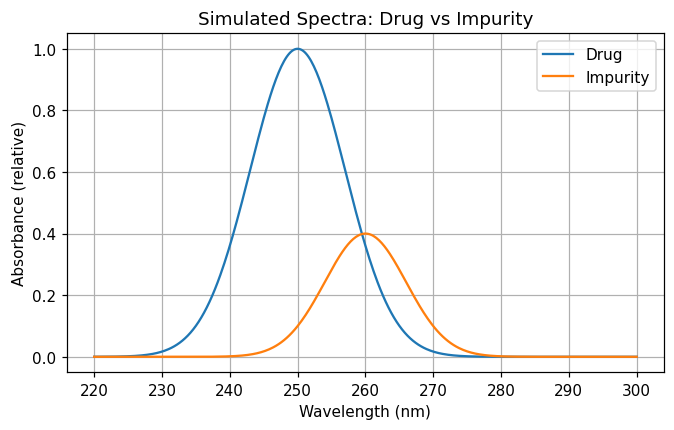


Notice:
• Drug absorbs most strongly near ~250 nm (λmax).
• Impurity absorbs more strongly near ~260 nm.
Choosing a wavelength with high analyte signal and lower impurity contribution
improves selectivity.



In [6]:
# @title 🌈 Simulated Drug vs Impurity Spectra
wavelengths = np.linspace(220, 300, 401)

def gaussian(x, mu, sigma, A):
    return A * np.exp(-(x-mu)**2 / (2*sigma**2))

# Drug: peak at 250 nm
drug_A = gaussian(wavelengths, mu=250, sigma=7, A=1.0)

# Impurity: peak at 260 nm, smaller intensity
imp_A = gaussian(wavelengths, mu=260, sigma=6, A=0.4)

plt.figure(figsize=(7,4))
plt.plot(wavelengths, drug_A, label="Drug")
plt.plot(wavelengths, imp_A, label="Impurity")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Absorbance (relative)")
plt.title("Simulated Spectra: Drug vs Impurity")
plt.grid(True)
plt.legend()
plt.show()

print("""
Notice:
• Drug absorbs most strongly near ~250 nm (λmax).
• Impurity absorbs more strongly near ~260 nm.
Choosing a wavelength with high analyte signal and lower impurity contribution
improves selectivity.
""")


In [7]:
# @title 🎯 Wavelength Selection Playground
import ipywidgets as widgets
from ipywidgets import interact

def wavelength_selector(lambda_sel=250):
    # linear interpolation of spectra at selected wavelength
    lam = lambda_sel
    # find nearest indices
    idx = (np.abs(wavelengths - lam)).argmin()
    A_drug = drug_A[idx]
    A_imp = imp_A[idx]

    plt.figure(figsize=(7,4))
    plt.plot(wavelengths, drug_A, label="Drug")
    plt.plot(wavelengths, imp_A, label="Impurity")
    plt.axvline(lam, linestyle="--", label=f"λ = {lam} nm")
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Absorbance (relative)")
    plt.title("Drug and Impurity Spectra with Chosen Wavelength")
    plt.grid(True)
    plt.legend()
    plt.show()

    ratio = A_drug / (A_imp + 1e-6)  # avoid divide by zero
    print(f"At λ = {lam} nm:")
    print(f"  Drug absorbance (relative):     {A_drug:.3f}")
    print(f"  Impurity absorbance (relative): {A_imp:.3f}")
    print(f"  Drug/Impurity signal ratio:     {ratio:.1f}")

    print("""
Interpretation:
• Higher drug/impurity ratio ⇒ better selectivity.
• λmax is not always the best choice if impurities also absorb strongly there.
""")

interact(
    wavelength_selector,
    lambda_sel=widgets.IntSlider(value=250, min=220, max=300, step=1, description="λ (nm)")
)


interactive(children=(IntSlider(value=250, description='λ (nm)', max=300, min=220), Output()), _dom_classes=('…

<function __main__.wavelength_selector(lambda_sel=250)>

In [8]:
# @title 🧠 Q3 – Choosing a Wavelength
print(r"""
Suppose at 250 nm: Drug A = 1.00, Impurity A = 0.30
and at 260 nm: Drug A = 0.80, Impurity A = 0.20.

Which wavelength offers BETTER selectivity for the drug relative to impurity?

A. 250 nm
B. 260 nm
C. Both are equal
D. Neither is acceptable
""")

q3 = "A"  # @param ["A","B","C","D"]
# Calculate signal ratios: 250 → 1.00/0.30 ≈ 3.33; 260 → 0.80/0.20 = 4.0 ⇒ 260 nm better
q3_key = "B"
q3_score = grade_mcq(q3, q3_key)

if q3_score:
    print("✅ Correct. 260 nm gives a higher drug/impurity signal ratio in this scenario.")
else:
    print("❌ Check the drug:impurity ratio at each wavelength; higher ratio = better selectivity.")



Suppose at 250 nm: Drug A = 1.00, Impurity A = 0.30  
and at 260 nm: Drug A = 0.80, Impurity A = 0.20.

Which wavelength offers BETTER selectivity for the drug relative to impurity?

A. 250 nm  
B. 260 nm  
C. Both are equal  
D. Neither is acceptable

❌ Check the drug:impurity ratio at each wavelength; higher ratio = better selectivity.


## 6️⃣ Application – Determining an Unknown Concentration

A calibration curve at 250 nm for a drug in 1 cm cuvettes gives:

| c (mg/L) | A |
|---------:|---:|
|  5       | 0.120 |
| 10       | 0.245 |
| 15       | 0.365 |
| 20       | 0.490 |

A linear regression (done by the instrument) yields:

\[
A = 0.0245\,c + 0.000 \quad (\text{c in mg/L})
\]

An unknown sample gives **A = 0.392** at 250 nm.

**Example calculation:**

\[
c_{\text{unknown}} = \frac{A}{0.0245}
= \frac{0.392}{0.0245} \approx 16.0\ \text{mg/L}
\]

Now you will enter your own calculation.


In [9]:
# @title 🧮 Q4 – Unknown Concentration from Calibration
print("""
Using A = 0.392 and the calibration equation A = 0.0245 c (c in mg/L),
enter the concentration (c) of the unknown in mg/L, to 1 decimal place.
""")

q4 = 0.0  # @param {type:"number"}
q4_key = 16.0
q4_score = grade_numeric(q4, q4_key, tol=0.5)

if q4_score:
    print("✅ Correct. The unknown concentration is ~16.0 mg/L.")
else:
    print("❌ Recalculate: c = A / slope = 0.392 / 0.0245.")



Using A = 0.392 and the calibration equation A = 0.0245 c (c in mg/L),
enter the concentration (c) of the unknown in mg/L, to 1 decimal place.

❌ Recalculate: c = A / slope = 0.392 / 0.0245.


In [10]:
# @title 🧩 Q5 – Method Suitability for a High-Dose Tablet
print(r"""
You are asked to assay a high-dose tablet (500 mg) of a UV-active drug with a
strong, isolated peak at 250 nm and minimal excipient interference.

Which analytical approach is MOST reasonable as a routine QC assay?

A. UV/Vis spectrophotometry at 250 nm using a simple calibration curve.
B. LC–MS/MS with multiple reaction monitoring.
C. Manual gravimetric analysis only.
D. Visual inspection of tablet color.
""")

q5 = "A"  # @param ["A","B","C","D"]
q5_key = "A"
q5_score = grade_mcq(q5, q5_key)

if q5_score:
    print("✅ Correct. UV/Vis is appropriate and efficient for a high-dose, UV-strong, well-isolated API.")
else:
    print("❌ For a simple, high-dose UV-active API, UV/Vis is often a robust, compendial QC method.")



You are asked to assay a high-dose tablet (500 mg) of a UV-active drug with a
strong, isolated peak at 250 nm and minimal excipient interference.

Which analytical approach is MOST reasonable as a routine QC assay?

A. UV/Vis spectrophotometry at 250 nm using a simple calibration curve.  
B. LC–MS/MS with multiple reaction monitoring.  
C. Manual gravimetric analysis only.  
D. Visual inspection of tablet color.

✅ Correct. UV/Vis is appropriate and efficient for a high-dose, UV-strong, well-isolated API.


> 📝 **Updated Practice Note (Beyond Older Watson Editions):**  
> While classical UV/Vis assays remain common (especially for high-dose and
> simple formulations), modern practice also uses:
>
> - **Diode-array detectors (DAD/PDA)** to monitor full spectra and detect
>   co-eluting species.  
> - **LC–UV** or **LC–MS/MS** for complex matrices or low-dose products.  
>
> Method validation follows **ICH Q2(R2)** and **Q14**, with emphasis on:
>
> - Linearity, range, accuracy, precision  
> - Specificity (including interference testing)  
> - Robustness (e.g., small shifts in λ, pH, solvent composition)
>
> In this module we use simplified models for teaching, but you should be aware
> that real-world methods are validated and maintained over a full lifecycle.


## ✅ 7️⃣ Summary Quiz & Logging

This short quiz checks your understanding of:

- Beer–Lambert law and A/T relationship  
- Calibration curves and unknown concentration  
- Wavelength selection and method suitability  

Your score and completion will be logged.


In [11]:
# @title ✅ Summary & Performance Logging
import csv, os
from datetime import datetime

scores = {
    "Q1_beer_lambert": q1_score,
    "Q2_transmittance": q2_score,
    "Q3_wavelength_select": q3_score,
    "Q4_unknown_conc": q4_score,
    "Q5_method_suitability": q5_score,
}

total_correct = sum(scores.values())
max_score = len(scores)
percent = round(100 * total_correct / max_score, 1)

print(f"Module 04 Score: {total_correct}/{max_score} = {percent}%")

# from google.colab import drive
# drive.mount('/content/drive')

log_dir = "/content/drive/MyDrive/PHS317_Pharmaceutical_Analysis/performance_logs"
os.makedirs(log_dir, exist_ok=True)
log_path = os.path.join(log_dir, "M04_performance_log.csv")

file_exists = os.path.isfile(log_path)
with open(log_path, "a", newline="") as f:
    writer = csv.writer(f)
    if not file_exists:
        writer.writerow(["timestamp","module","student_id","student_name","percent"] + list(scores.keys()))
    writer.writerow([datetime.now().isoformat(timespec="seconds"),
                     MODULE_NAME,
                     student_id,
                     student_name,
                     percent] + list(scores.values()))

print("""
✅ Your Module 04 results have been logged.

If your instructor asks for proof of completion, you may:
• Download this notebook as a PDF, OR
• Screenshot this cell showing your score.
""")


Module 04 Score: 1/5 = 20.0%


NameError: name 'MODULE_NAME' is not defined